In [2]:
# IMPORTING SOME BASE LIBRARIES

import pandas as pd
import numpy as np
import time as time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
# READING THE DATA

data = pd.read_csv("/kaggle/input/bbc-news/bbc_news.csv")
data.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [21]:
# PERFORMING SOME INITIAL CHECKS

def check(data):
    
    # PRINTING DATA TYPES OF COLUMNS
    print("Data Types:")
    print(data.dtypes)
    
    # PRINTING RESULTING SHAPE OF THE DATA
    print("Number of Rows of Dataframe:", data.shape[0])
    print("Number of Columns of Dataframe:", data.shape[1], '\n')
    
    # CHECKING IF ANY NULL VALUES PRESENT
    print("Number of Null Values:")
    print(data.isna().sum(), '\n')

# Example usage
check(data)

Data Types:
title          object
pubDate        object
guid           object
link           object
description    object
dtype: object
Number of Rows of Dataframe: 20357
Number of Columns of Dataframe: 5 

Number of Null Values:
title          0
pubDate        0
guid           0
link           0
description    0
dtype: int64 



In [22]:
#PERFORMING SOME PREPROCESSING INCLUDING RENAMING AND ROPPING COLS.   

def process(data):
    
    data = data.drop_duplicates()
    data = data.drop(columns = {'pubDate','guid','link'}, axis = 1)
    data = data.rename(columns = {'title': 'Title', 'description':'Description'})
    
    return data 

data = process(data)

print("Data after renaming and dropping some cols:")
data.head()

Data after renaming and dropping some cols:


,Title,Description
0,Ukraine: Angry Zelensky vows to punish Russian...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,Consumers are feeling the impact of higher ene...


In [23]:
# COMBINING THE TITLE AND DESCR. COLS

def combine_title_description(df):
    
    df["Title"] = df["Title"].str.strip()
    df["Description"] = df["Description"].str.strip()

    separator = " "
    df["Text"] = df["Title"] + separator + df["Description"]
    
    df.drop(["Title", "Description"], axis = 1, inplace = True)
    df['Text'] = df['Text'].astype(str)
    
    return df

combine_title_description(data)
data.head()

,Text
0,Ukraine: Angry Zelensky vows to punish Russian...
1,War in Ukraine: Taking cover in a town under a...
2,Ukraine war 'catastrophic for global food' One...
3,Manchester Arena bombing: Saffie Roussos's par...
4,Ukraine conflict: Oil price soars to highest l...


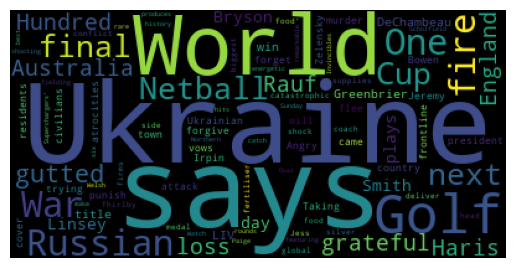

<Figure size 4000x4000 with 0 Axes>

In [25]:
# CEATE WORDCLOUD PRIOR TO PREPROCESSING STEPS

from wordcloud import WordCloud

def create_wordcloud(data, column):
    words = data[column].values 
    wordcloud = WordCloud().generate(str(words))

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    plt.figure(figsize = (40,40), facecolor = None)

create_wordcloud(data, 'Text')

Info. about Text columns is as follows: 



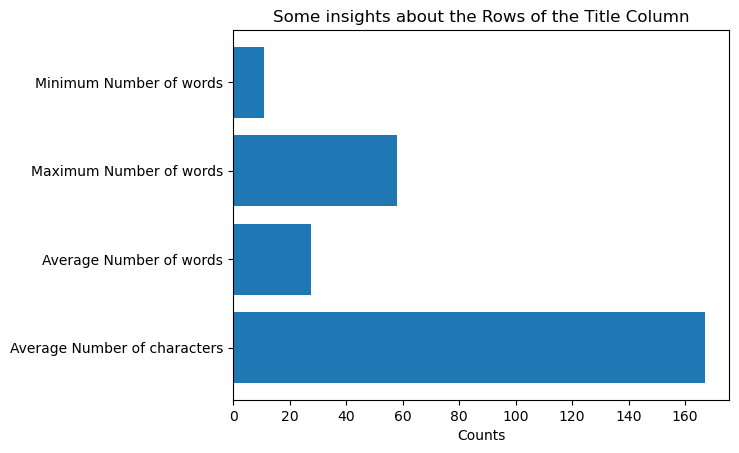

In [29]:
# VISUALIZING SOME INSIGHTS ABOUT TITLE COLUMN

def column_info(data, column):
    
    print(f"Info. about {column} columns is as follows:",'\n')
    
    data['chars'] = data[column].str.len()
    
    a = data['chars'].mean()
    
    data['words'] = data[column].str.split().str.len()
    b = data['words'].mean()
    
    c = data['words'].max()
    
    d = data['words'].min()
    
    plt.barh(width = [a,b,c,d], y = ['Average Number of characters','Average Number of words','Maximum Number of words','Minimum Number of words'])
    plt.title("Some insights about the Rows of the Title Column")
    plt.xlabel("Counts")
    
column_info(data, 'Text')

Text(0, 0.5, 'Counts')

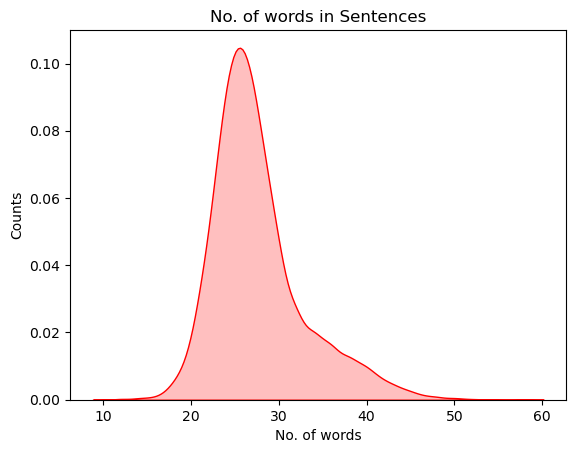

In [30]:
# PLOTTING KDE PLOT TO CHECK LENGTH OF SENTENCES

sns.kdeplot(data['words'], fill = True, color = 'red')
plt.title("No. of words in Sentences")
plt.xlabel("No. of words")
plt.ylabel("Counts")

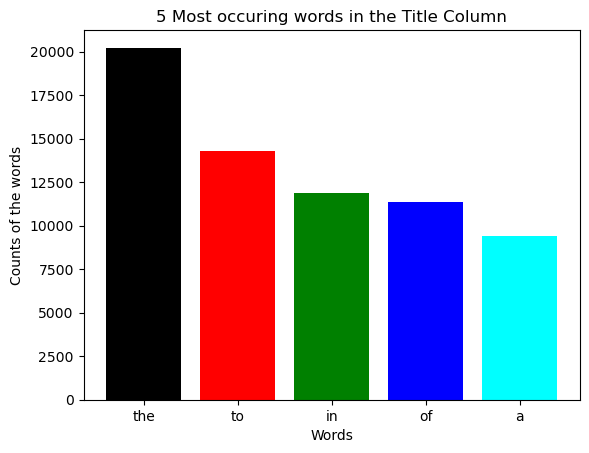

In [32]:
# PRINTING 5 MOST OCCURING WORDS IN THE TITLE COLUMN

def most_occuring_words(data, column):
    words = []
    
    word = []
    count = []
    
    for i in data[column]:
        for j in i.split():
            words.append(j)
            
    from collections import Counter
    counter = Counter(words)

    list = counter.most_common(5)
    for i,j in list:
        word.append(i)
        count.append(j)

    plt.bar(x = word, height = count,color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.title("5 Most occuring words in the Title Column")
    plt.xlabel("Words")
    plt.ylabel("Counts of the words")
    
most_occuring_words(data, 'Text')

In [34]:
# INSTALLING PACKAGES FOR TEXT PREPROCESSING

%pip install nltk
%pip install textacy
import nltk
nltk.download("corpus")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


NameError: name 'nltk' is not defined

In [ ]:
# IMPORTING LIBRARIES REQUIRED FOR TEXT PREPROCESSING

import nltk

from nltk.corpus import stopwords
stopwords = [stopwords.words('english')]

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

from textacy import preprocessing

In [9]:
# TEXT PREPROCESSING STEPS

def preprocess_text(data, column):
    
    # CONVERTING THE TEXT TO LOWERCASE
    data[column] = data[column].str.lower()
    
    # REMOVING THE STOPWORDS
    data[column] = data[column].apply(lambda x: ' '.join([i for i in x.split() if i not in stopwords]))
    
    # REMOVING EXTRA PUNCTUATIONS
    data[column] = data[column].apply(lambda x: preprocessing.remove.punctuation(x))
    
    # NORMALIZING WHITESPACES
    data[column] = data[column].apply(lambda x: preprocessing.normalize.whitespace(x))
    
    # REMOVING HASHTAGS
    data[column] = data[column].apply(lambda x: preprocessing.replace.hashtags(x))
    
    # STEMMING THE WORDS TO ROOT FORM
    data[column] = data[column].apply(lambda x: stemmer.stem(x))
    
    return data

data = preprocess_text(data, 'Text')
data.head()

,Title,chars,words
0,ukraine angry zelensky vows to punish russian ...,57,8
1,war in ukraine taking cover in a town under at...,51,10
2,ukraine war catastrophic for global food,42,6
3,manchester arena bombing saffie roussos s pare...,71,10
4,ukraine conflict oil price soars to highest le...,61,10


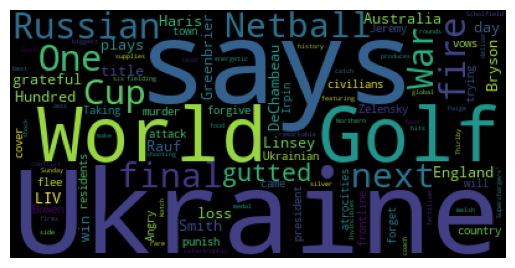

<Figure size 4000x4000 with 0 Axes>

In [35]:
# CREATING WORDCLOUD TO VISUALIZE MOST FREQUENT WORDS AFTER PREPROCESSING

create_wordcloud(data, 'Text')

In [37]:
# WORD TOKENISING THE COLUMN PRIOR TO CREATION OF WORD EMBEDDINGS

from nltk.tokenize import word_tokenize

data['Text'] = data['Text'].apply(lambda x: word_tokenize(x))

data.head()

,Text,chars,words
0,"[Ukraine, :, Angry, Zelensky, vows, to, punish...",157,24
1,"[War, in, Ukraine, :, Taking, cover, in, a, to...",154,28
2,"[Ukraine, war, 'catastrophic, for, global, foo...",144,23
3,"[Manchester, Arena, bombing, :, Saffie, Rousso...",172,26
4,"[Ukraine, conflict, :, Oil, price, soars, to, ...",158,26


In [39]:
# TRAINING A FASTTEXT MODEL TO CREATE WORD EMBEDDINGS

from gensim.models import FastText 

model_ft = FastText(data['Text'], 
                          min_count=2,
                          vector_size=100, 
                          window=3, 
                          )

In [43]:
# CHECKING OUT THE MOST SIMILAR EMBEDDING TO ONE OF THE WORDS

model_ft.wv.most_similar("you")

[("'you", 0.9983745217323303),
 ("'we", 0.9495788812637329),
 ('we', 0.9428693056106567),
 ('your', 0.9262189865112305),
 ('do', 0.9199089407920837),
 ("'You", 0.9149360060691833),
 ('much', 0.9110168218612671),
 ('LFTs', 0.9040011167526245),
 ('axe', 0.9037079215049744),
 ('I', 0.9034649729728699)]

In [44]:
# CHECKINGOUT WORD EMBEDDING OF THE WORD 'SAY'

model_ft.wv['say']

array([-0.79305804,  0.40008888, -0.17098577, -0.66983014,  0.5825195 ,
        1.0732964 ,  0.6390895 ,  1.4659454 ,  1.3583517 , -0.38224763,
       -1.7256125 ,  0.5352052 , -1.1600248 ,  2.102392  , -1.6372539 ,
       -0.88909674, -0.27353168, -0.47595304, -0.9176339 , -3.1931784 ,
       -2.4205382 ,  1.2435125 ,  1.1003412 , -0.43875736, -1.1966604 ,
       -0.27779797, -2.9124217 ,  1.3751948 ,  0.31062073, -0.06259087,
       -1.3090632 ,  1.1030378 ,  1.2945274 ,  1.4420236 ,  0.32809466,
        1.544611  ,  2.2839625 , -0.67107576, -1.5843273 , -1.8845997 ,
        0.23316292,  0.8345354 ,  0.3979446 ,  0.35363892, -0.836469  ,
       -0.04932743, -0.15668687,  0.28965607,  0.63677025, -2.572848  ,
        2.0908124 ,  0.72114766,  0.06228385,  1.2849381 ,  0.99272746,
        0.1400485 , -0.1839521 , -0.14938688,  0.7013321 , -0.3191934 ,
       -0.41109186, -0.4898279 ,  0.5590731 ,  0.7234578 ,  1.2634236 ,
        0.60996276, -0.2280003 , -1.2398728 , -0.9034161 , -0.44

In [45]:
# CREATING THE EMBEDDINGS USING THE TRAINED FASTTEXT MODEL

embeddings = []
for i in data['Text']:
    embedding = np.mean([model_ft.wv[word] for word in i], axis = 0)
    embeddings.append(embedding)
    
embeddings[0:3]

[array([-1.02023430e-01, -1.98801920e-01, -7.13677347e-01, -4.33105201e-01,
         4.04556692e-01,  2.21490756e-01, -3.77887845e-01,  5.85385919e-01,
         3.24910015e-01, -3.91116142e-01, -3.28001380e-01, -3.91494483e-03,
        -9.49708670e-02,  9.53587234e-01, -4.77543294e-01, -3.11119020e-01,
         2.69392788e-01, -5.58498144e-01, -6.60736978e-01, -9.46153879e-01,
        -7.33669162e-01, -1.02775902e-01, -7.12766573e-02, -3.16311151e-01,
        -3.05792332e-01, -3.59806865e-01, -7.59714007e-01,  9.31928903e-02,
         1.60996497e-01, -4.80156951e-02, -2.50105202e-01,  1.58144653e-01,
         6.75652444e-01, -1.87126890e-01,  3.63649011e-01,  1.71392903e-01,
         5.54509223e-01, -3.89123000e-02, -5.54142058e-01, -2.23568812e-01,
         3.39182734e-01, -1.70268759e-01, -5.64871907e-01, -4.53836292e-01,
        -3.83690864e-01, -1.33184120e-01, -1.61278412e-01, -7.77646974e-02,
         4.69572067e-01,  8.52862671e-02,  1.24526724e-01, -9.49639536e-04,
        -2.1

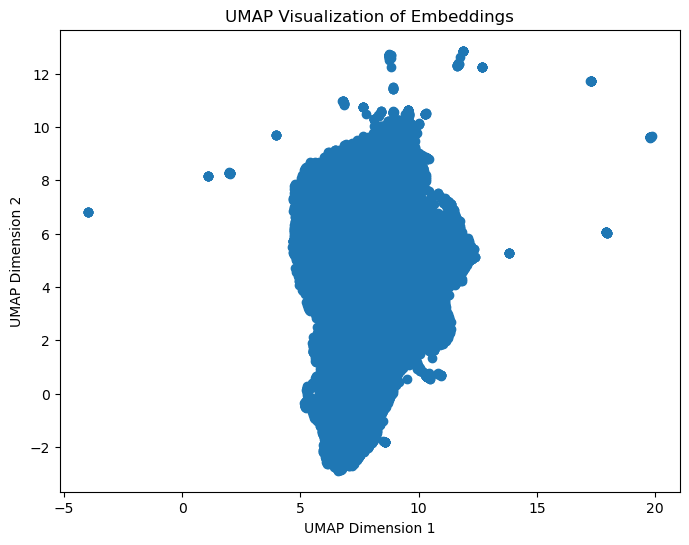

In [47]:
# USING UMAP TO VISUALIZE THE EMBEDDINGS

import umap

embeddings_array = np.array(embeddings)

umap_emb = umap.UMAP(n_components=2, random_state=42)
embeddings_umap = umap_emb.fit_transform(embeddings_array)

plt.figure(figsize=(8, 6))
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1])
plt.title('UMAP Visualization of Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [48]:
# TRAINING LDA ON THE EMBEDDINGS

from sklearn.decomposition import LatentDirichletAllocation 
from sklearn.preprocessing import normalize

embeddings = normalize(embeddings)
embeddings[embeddings < 0] = 0
lda = LatentDirichletAllocation(n_components = 5, learning_method = 'batch')

In [49]:
# FITTING THE LDA TO OUR EMBEDDINGS

topics = lda.fit_transform(embeddings)

In [50]:
# GETTING THE TOPIC TERM MATRIX FOR OUR LDA MODEL

lda.components_

array([[1.23877748e+01, 6.58852848e+01, 4.25509741e-01, 6.72036043e+01,
        7.55819754e+02, 3.16530906e+02, 6.97854603e+00, 6.14790607e+02,
        1.44608254e+02, 2.00000000e-01, 3.15635200e+01, 2.09043332e-01,
        1.39705014e+02, 1.04915860e+03, 3.14787916e+01, 2.16002113e+00,
        2.11758017e+02, 3.71766846e+00, 2.00000000e-01, 2.00014982e-01,
        2.00000000e-01, 1.96894424e+00, 2.04865326e-01, 2.39775128e+01,
        7.61923250e-01, 2.00060943e-01, 7.86935681e-01, 1.04075799e+01,
        1.78003187e+02, 1.92048141e+02, 4.20177455e-01, 4.73600254e+01,
        8.83441570e+02, 4.37862401e-01, 1.85304977e+02, 3.37953809e+02,
        2.36095181e+01, 2.60931449e+02, 5.12957556e-01, 2.16342254e-01,
        7.25577160e+02, 2.00030257e-01, 7.30312260e+00, 2.00048708e-01,
        2.00027904e-01, 7.70890058e+00, 3.08099009e+00, 2.30085369e+01,
        4.58692975e+02, 7.23698135e+02, 8.68556522e+01, 2.02552138e-01,
        3.51848439e+02, 1.35120340e+01, 3.25282701e-01, 1.890087

In [53]:
# GETTING THE TOP TITLES FOR EACH TOPIC FOUBND USING LDA

for i, j in enumerate(lda.components_):
    top_titles = data.iloc[np.argsort(j)[-5:]]['Text']

top_titles

32    [Belfast, :, The, sounds, of, the, city, durin...
13    [Twitter, is, part, of, our, war, effort, -, U...
71    [Shane, Warne, :, Australian, cricket, legend,...
65    [Northumberland, shooting, star, caught, on, o...
95    [Ukraine, maps, :, Ukraine, says, Russian, cea...
Name: Text, dtype: object

In [86]:
# GETTING THE TOP WORDS IN EACH AND EVERY TOPIC CREATED

text_data = data['Text']
vocab = set()
for text in text_data:
    for word in text:
        vocab.add(word)
vocab = list(vocab)

num = 10
for i, top in enumerate(lda.components_):
    top_idx = top.argsort()[:-num - 1:-1]
    top_words = [vocabulary_list[j] for j in top_idx]
    print(f"Topic {i+1}: {' '.join(top_words)}")

Topic 1: Sania disrupts Erbay lob astronomical See Dressmaker Tortoise theorist temporary
Topic 2: disrupts Erbay Sania temporary astronomical See lob amateur 'Green theorist
Topic 3: disrupts Erbay Sania temporary astronomical See 'Green lob theorist amateur
Topic 4: disrupts Erbay Sania See lob temporary 'Green biodiversity astronomical Henrietta
Topic 5: disrupts Erbay temporary Sania lob 'Green amateur Cunningham troop biodiversity


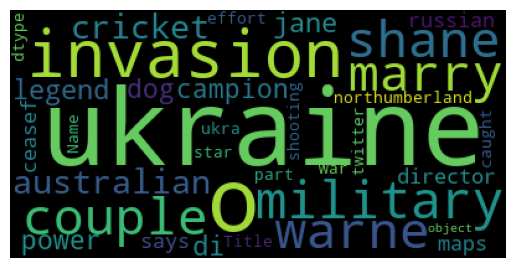

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

In [27]:
# CREATING A WORDCLOUD FOR TEXT IN THE TOP TITLES

words = top_titles
wordcloud = WordCloud().generate(str(words))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.figure(figsize = (40,40), facecolor = None)
